# Машинное обучение. Классификация

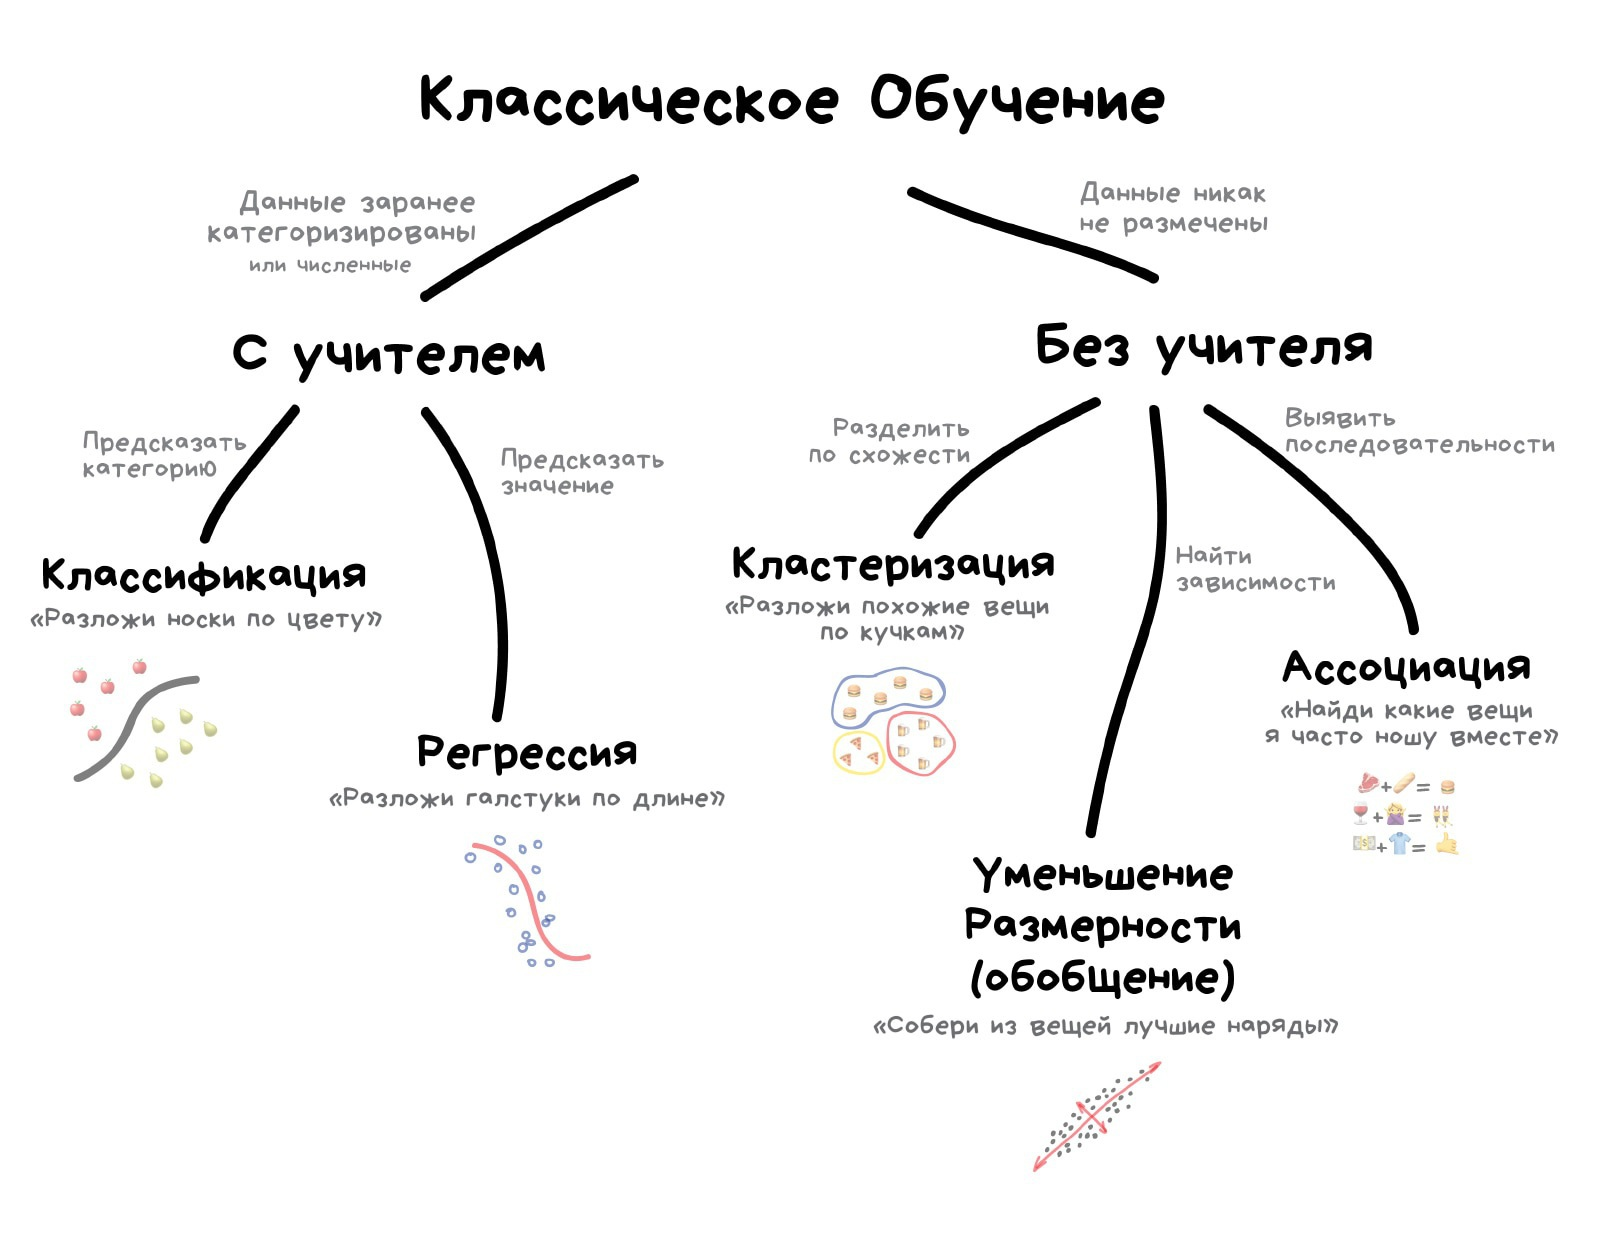

In [1]:
from IPython.display import Image

Image("виды машинного обучения.jpg", width=750, height=750)

## Что такое классификация?

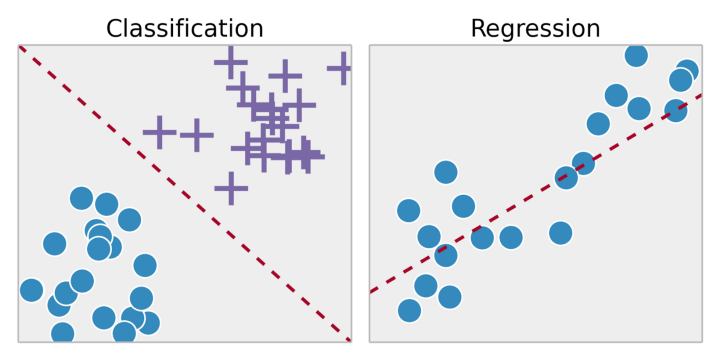

In [2]:
Image("классификация и регрессия.png", width=750, height=750)

## Генеративное обучение

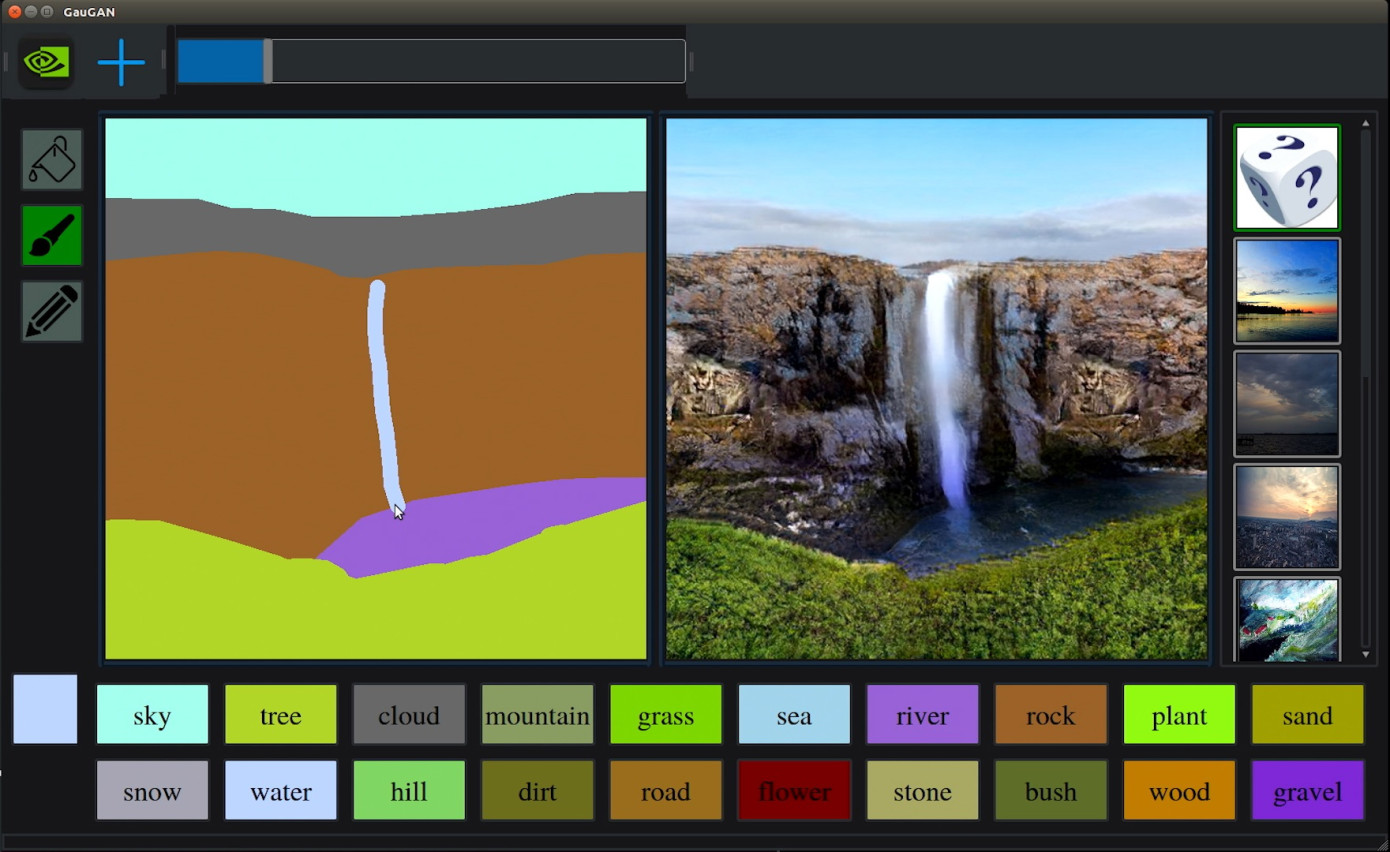

In [102]:
Image("Gan.jpg", width=750, height=750)

### Загрузка необходимых библиотек

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import warnings
warnings.filterwarnings('ignore')

### Постановка задачи

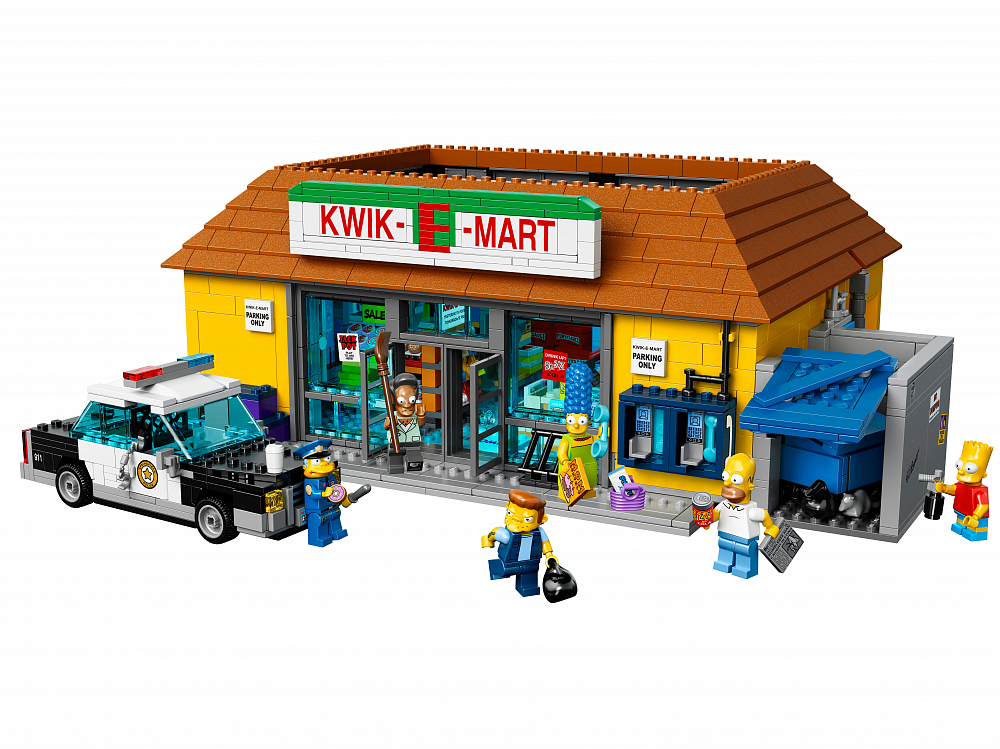

In [5]:
Image("shop.jpg", width=750, height=750)

Федеральная сеть продуктовых магазинов насчитывает более 2500 точек на территории Российской Федерации. 
Все магазины имеют схожий ассортимент, площадь торговой точки, проводимые маркетинговые акции.
При этом разные точки продаж имеют разную эффективность (измеряемую в среднедневной выручке в рублях).
Руководство сети, при открытие нового магазина, хотело бы, чтобы данная точка продаж была высокоэффективной.
В связи с этим, вам поставлена задача, разработать математическую модель, предсказывающую по геоданным, эффективность потенциальной точки продаж. 

### Загрузка данных

In [6]:
df=pd.read_csv('geo_data_for_shops.csv', sep=';')
df.head()

,city,subject,shop_id,latitude,longitude,distance_adm_cent,count_population,pop_dens,count_shop_id_city,dist_shop_id,...,min_dist_college,n_fast_food,min_dist_fast_food,n_food_court,min_dist_food_court,n_bank,min_dist_bank,n_fuel,min_dist_fuel,sale_k
0,Октябрьский Башкирия,Республика Башкортостан,0,54.48,53.47,2.826343,113929,23090.735699,13,355.725567,...,290.465563,3.0,219.409979,0.0,0.000000,8.0,85.311344,1.0,784.548278,1
1,Липецк,Липецкая область,1,52.59,39.54,0.140535,509735,5892.641538,49,373.501516,...,645.614911,4.0,605.594549,0.0,0.000000,9.0,341.639114,1.0,205.710027,1
2,Миасс,Челябинская область,2,55.14,60.16,1.394444,151673,6134.359515,30,813.838087,...,761.865801,4.0,541.181102,0.0,0.000000,2.0,575.133239,0.0,1109.679098,0
3,Ижевск,Республика Удмуртия,3,56.84,53.29,0.057143,648213,NaN,56,746.507070,...,1461.988145,3.0,320.698641,0.0,5924.810409,10.0,211.291717,3.0,472.379866,0
4,Туймазы,Республика Башкортостан,4,54.60,53.70,2.580984,68410,24960.514031,9,520.796643,...,1143.235549,0.0,0.000000,0.0,0.000000,2.0,573.863078,1.0,603.391275,0


### Геоданные
- карта OpenStreetMaps
- яндекс карта 
- яндекс народная карта
- википедия
- данные сайта "Реформа ЖКХ"

In [7]:
df.columns

Index(['city', 'subject', 'shop_id', 'latitude', 'longitude',
       'distance_adm_cent', 'count_population', 'pop_dens',
       'count_shop_id_city', 'dist_shop_id', 'count_shop_id_km',
       'dist_competitor_1', 'dist_competitor_2', 'dist_competitor_3',
       'dist_competitor_4', 'min_dist_tertiary', 'min_dist_secondary',
       'min_dist_road', 'min_dist_primary', 'min_dist_footway',
       'n_traffic_signals', 'min_dist_traffic_signals', 'n_parking_space',
       'min_dist_parking_space', 'min_dist_parking', 'n_parking_entrance',
       'min_dist_parking_entrance', 'n_parking', 'n_bus_stop',
       'min_dist_bus_stop', 'n_tram_stop', 'min_dist_tram_stop',
       'n_apartments', 'min_dist_apartments', 'n_house', 'min_dist_house',
       'n_residential', 'min_dist_residential', 'n_dormitory',
       'min_dist_dormitory', 'n_terrace', 'min_dist_terrace', 'n_industrial',
       'min_dist_industrial', 'n_office', 'min_dist_office', 'n_cinema',
       'min_dist_cinema', 'n_marketplace'

### Данные

In [8]:
# Объем данных
df.shape

(2874, 67)

In [9]:
# Статистика
df.describe()

,shop_id,latitude,longitude,distance_adm_cent,count_population,pop_dens,count_shop_id_city,dist_shop_id,count_shop_id_km,dist_competitor_1,...,min_dist_college,n_fast_food,min_dist_fast_food,n_food_court,min_dist_food_court,n_bank,min_dist_bank,n_fuel,min_dist_fuel,sale_k
count,2874.000000,2874.000000,2874.000000,2874.000000,2.874000e+03,2518.000000,2874.000000,2874.000000,2874.000000,2874.000000,...,2.874000e+03,2874.000000,2.874000e+03,2874.000000,2874.000000,2874.000000,2.874000e+03,2874.000000,2.874000e+03,2874.000000
mean,1436.500000,55.609092,52.069022,0.874791,6.843601e+05,20393.578172,51.500348,574.238400,2.426931,1969.939763,...,5.039523e+03,2.618650,4.172054e+03,0.047321,1523.095587,5.649617,4.416058e+03,1.613779,4.692178e+03,0.949896
std,829.796662,2.549059,11.199239,1.227423,7.382802e+05,17169.628473,56.067784,207.268910,1.601987,3536.310737,...,1.247637e+05,4.272889,1.227528e+05,0.247201,2748.159387,6.279824,1.248053e+05,1.614554,1.246977e+05,0.745513
min,0.000000,44.560000,28.270000,0.000000,1.030000e+02,57.215412,1.000000,11.111000,1.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,718.250000,54.092500,41.010000,0.127031,9.513900e+04,7438.178567,10.000000,419.467722,1.000000,214.589053,...,4.628583e+02,0.000000,2.516069e+02,0.000000,0.000000,2.000000,1.698063e+02,0.000000,4.596496e+02,0.000000
50%,1436.500000,55.455000,53.990000,0.268797,4.165210e+05,16146.792354,31.000000,564.478168,2.000000,431.473193,...,8.384909e+02,1.000000,5.833534e+02,0.000000,0.000000,4.000000,3.391393e+02,1.000000,7.310786e+02,1.000000
75%,2154.750000,56.890000,60.620000,1.208642,1.120547e+06,28266.841831,71.000000,734.083177,3.000000,807.153817,...,1.481986e+03,3.000000,1.074415e+03,0.000000,2260.009945,7.000000,5.871702e+02,2.000000,1.050737e+03,2.000000
max,2873.000000,66.120000,77.780000,8.482116,3.894284e+06,149934.150234,198.000000,999.372532,13.000000,16889.487519,...,4.653862e+06,37.000000,4.654559e+06,3.000000,27027.539042,54.000000,4.654402e+06,9.000000,4.652587e+06,2.000000


In [10]:
# Группировка по регионам
df.groupby(by='subject', as_index=False).count().sort_values(by='shop_id', ascending=False)

,subject,city,shop_id,latitude,longitude,distance_adm_cent,count_population,pop_dens,count_shop_id_city,dist_shop_id,...,min_dist_college,n_fast_food,min_dist_fast_food,n_food_court,min_dist_food_court,n_bank,min_dist_bank,n_fuel,min_dist_fuel,sale_k
42,Челябинская область,379,379,379,379,379,379,363,379,379,...,379,379,379,379,379,379,379,379,379,379
33,Свердловская область,339,339,339,339,339,339,316,339,339,...,339,339,339,339,339,339,339,339,339,339
24,Республика Башкортостан,203,203,203,203,203,203,195,203,203,...,203,203,203,203,203,203,203,203,203,203
15,Московская область,193,193,193,193,193,193,188,193,193,...,193,193,193,193,193,193,193,193,193,193
16,Нижегородская область,141,141,141,141,141,141,141,141,141,...,141,141,141,141,141,141,141,141,141,141
22,Пермский край,140,140,140,140,140,140,138,140,140,...,140,140,140,140,140,140,140,140,140,140
39,Тюменская область,109,109,109,109,109,109,0,109,109,...,109,109,109,109,109,109,109,109,109,109
32,Саратовская область,109,109,109,109,109,109,108,109,109,...,109,109,109,109,109,109,109,109,109,109
41,Ханты-Мансийский автономный округ,99,99,99,99,99,99,0,99,99,...,99,99,99,99,99,99,99,99,99,99
28,Республика Удмуртия,75,75,75,75,75,75,0,75,75,...,75,75,75,75,75,75,75,75,75,75


### Целевая переменая

In [11]:
# Количество магазинов в каждой категории
# 0 - низкая эффективность; 1 - средняя эффективность; 2 - высокая эффективность.

df.groupby(by='sale_k', as_index=False).count()[['sale_k', 'shop_id']]

,sale_k,shop_id
0,0,874
1,1,1270
2,2,730


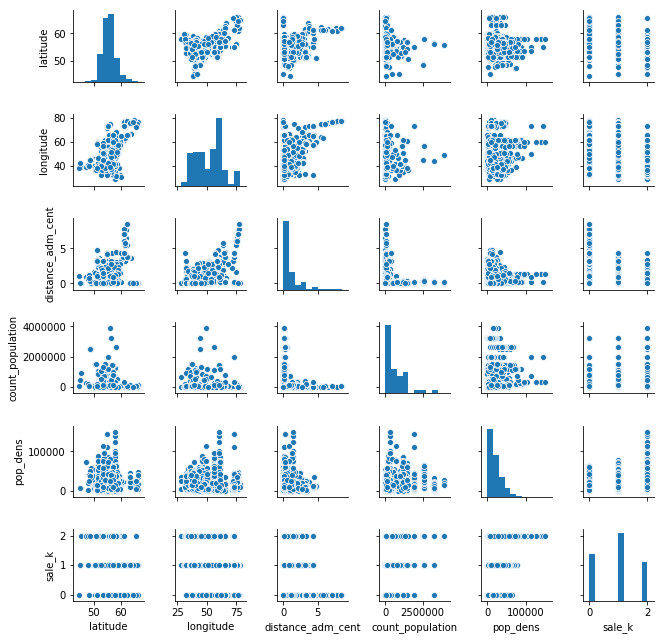

In [12]:
# Матрица графиков рассеяния геопризнаков и категории продаж
col=['latitude', 'longitude', 'distance_adm_cent',
       'count_population', 'pop_dens', 'sale_k']
sns.pairplot(df[col], size=1.5)

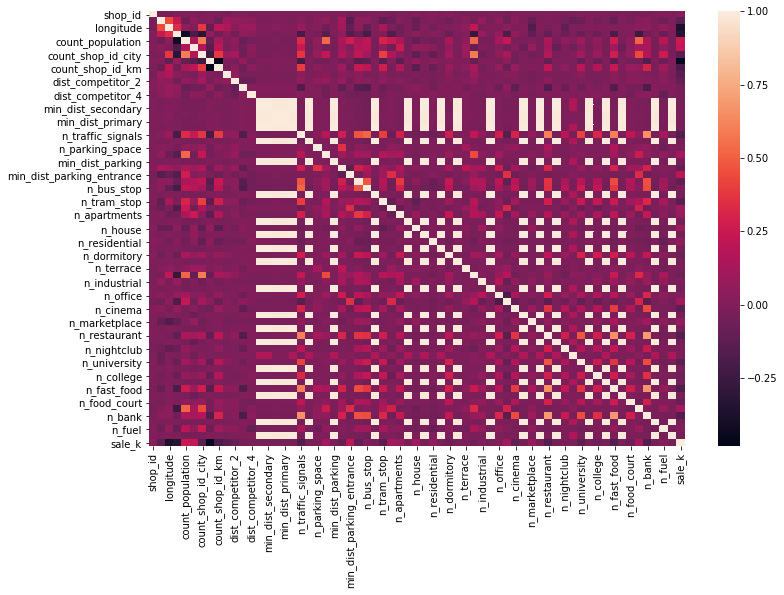

In [13]:
# Корреляционная матрица
data_corr=df.corr()

plt.figure(figsize = (12,8))
sns.heatmap(data_corr)

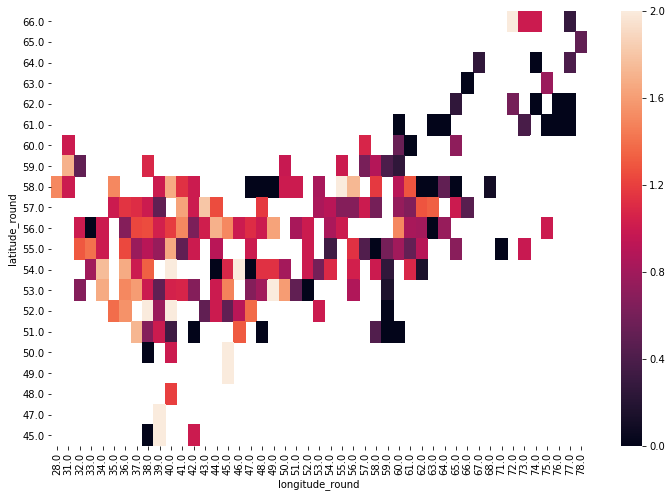

In [14]:
# Зависимость от долготы и широты
df_copy=df.copy()
df_copy['longitude_round']=np.round(df_copy['longitude'], 0)
df_copy['latitude_round']=np.round(df_copy['latitude'], 0)

plt.figure(figsize = (12,8))
sns.heatmap(df_copy.pivot_table('sale_k', index=['latitude_round'], 
                            columns=['longitude_round'],  aggfunc='mean').copy()
                                    .sort_values(by='latitude_round', ascending=False))



### Обработка пропущенных значений

In [15]:
# Количество строк с пропущенными значениями (отсортированный список)
(df.isnull().sum()).sort_values(ascending=False)

pop_dens                     356
min_dist_parking               0
min_dist_primary               0
min_dist_footway               0
n_traffic_signals              0
min_dist_traffic_signals       0
n_parking_space                0
min_dist_parking_space         0
sale_k                         0
min_dist_secondary             0
n_parking_entrance             0
min_dist_parking_entrance      0
n_parking                      0
n_bus_stop                     0
min_dist_bus_stop              0
n_tram_stop                    0
min_dist_road                  0
min_dist_tertiary              0
n_apartments                   0
dist_competitor_4              0
dist_competitor_3              0
dist_competitor_2              0
dist_competitor_1              0
count_shop_id_km               0
dist_shop_id                   0
count_shop_id_city             0
count_population               0
distance_adm_cent              0
longitude                      0
latitude                       0
          

In [16]:
# Удаление пропущенных значений (фильтрация)
df = df[df['pop_dens'].notnull()]
df.isnull().sum()['pop_dens']

0

In [17]:
# Удаление пропущенных значений (drop)
df = df.dropna()
df.isnull().sum()['pop_dens']

0

In [18]:
# Заполнение пропущенных значений нулями
df = df.fillna(0)

In [19]:
# Заполнение пропущенных значений последним непропущенным
df = df.fillna(method='ffill')

In [20]:
# Заполнение пропущенных значений средним по группе
df_group = df.groupby(by='subject', as_index=False).mean()[['subject', 'pop_dens']]
df = pd.merge(df, df_group, on=['subject'], suffixes=('', '_group'))
df['pop_dens'] = np.where(df['pop_dens'].notnull(), df['pop_dens'], df['pop_dens_group'])

### Подготовка данных для обучения модели

In [21]:
# Разделение признаков и целевой переменной. Удаление неинформативных признаков.

X=df[[
        # city
        'latitude',
        'longitude',
        'distance_adm_cent',
        'count_population',
        'pop_dens',

        #shop
        'count_shop_id_city',
        'dist_shop_id',
        'count_shop_id_km',
        'dist_competitor_1',
        'dist_competitor_2',
        'dist_competitor_3',
        'dist_competitor_4',

        #road
        'min_dist_tertiary',
        'min_dist_secondary',
        'min_dist_road',
        'min_dist_primary',
        'min_dist_footway',
        'n_traffic_signals', 
        'min_dist_traffic_signals',
        'n_parking_space',
        'min_dist_parking_space',
        'min_dist_parking',
        'n_parking_entrance', 
        'min_dist_parking_entrance',
        'n_parking',
        'n_bus_stop', 
        'min_dist_bus_stop',
        'n_tram_stop', 
        'min_dist_tram_stop',

        #house
        'n_apartments', 
        'min_dist_apartments',
        'n_house', 
        'min_dist_house',
        'n_residential', 
        'min_dist_residential',
        'n_dormitory', 
        'min_dist_dormitory',
        'n_terrace', 
        'min_dist_terrace',
        'n_industrial', 
        'min_dist_industrial',

        #other building                         
        'n_office', 
        'min_dist_office',
        'n_cinema', 
        'min_dist_cinema',
        'n_marketplace', 
        'min_dist_marketplace',
        'n_restaurant', 
        'min_dist_restaurant',
        'n_nightclub', 
        'min_dist_nightclub',
        'n_university', 
        'min_dist_university',
        'n_college',
        'min_dist_college',
        'n_fast_food',
        'min_dist_fast_food', 
        'n_food_court', 
        'min_dist_food_court',
        'n_bank', 
        'min_dist_bank',
        'n_fuel',
        'min_dist_fuel'
    ]]

Y=df['sale_k']

In [22]:
# Нулевой признак смещения
X['a']=1

In [23]:
# Разделяем выборку на обучающую и тестовую

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=Y)

print(X_train.shape)
print(X_test.shape)

from collections import Counter
print(Counter(Y))
print(Counter(Y_train))
print(Counter(Y_test))

(2014, 64)
(504, 64)
Counter({1: 1150, 2: 689, 0: 679})
Counter({1: 920, 2: 551, 0: 543})
Counter({1: 230, 2: 138, 0: 136})


In [24]:
# Масштабирование признаков

from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
X_train_norm=mms.fit_transform(X_train)
X_test_norm=mms.transform(X_test)

print('Минимум и максимум обучающего набора: ', X_train_norm.min(), X_train_norm.max())
print('Минимум и максимум тестового набора: ', X_test_norm.min(), X_test_norm.max())

Минимум и максимум обучающего набора:  0.0 1.0
Минимум и максимум тестового набора:  -0.006095896212448333 1.2698412698412698


<Figure size 432x288 with 0 Axes>

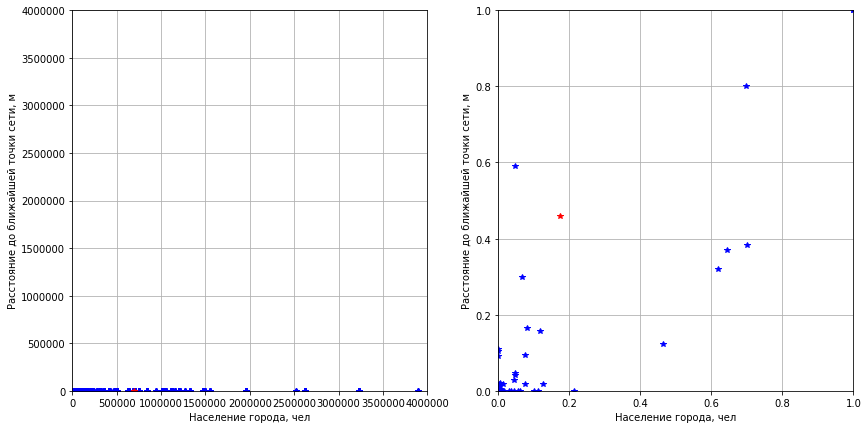

In [25]:
plt.figure()
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
plt.plot(X_train['count_population'], X_train['dist_shop_id'], 'b*')
plt.plot(700000, 500, 'r*')
plt.xlim([0, 4000000])
plt.ylim([0, 4000000])
plt.xlabel('Население города, чел')
plt.ylabel('Расстояние до ближайшей точки сети, м')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(X_train_norm[3], X_train_norm[6], 'b*')
plt.plot(X_train['count_population'], X_train['dist_shop_id'], 'b*')
plt.plot(0.175, 0.46, 'r*')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Население города, чел')
plt.ylabel('Расстояние до ближайшей точки сети, м')
plt.grid()

### Базовое решение

In [26]:
# В качестве базового решения используем наиболее часто встречающийся класс

Pred_base = Y_test*0+1

### Метрики качества

In [27]:
# Правильность (какое количество меток класса совпадает с метками предсказания)

from sklearn.metrics import accuracy_score

np.round(accuracy_score(Y_test, Pred_base), 2)

0.46

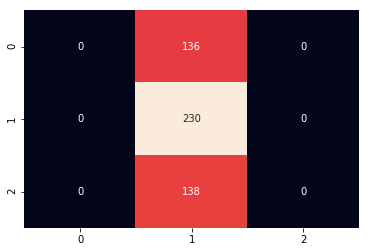

In [28]:
# Матрица ошибок

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(Y_test, Pred_base), annot=True, fmt="d", cbar=False)

In [29]:
# Точность и полнота классификационной модели

from sklearn.metrics import classification_report

print(classification_report(Y_test, Pred_base))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.46      1.00      0.63       230
           2       0.00      0.00      0.00       138

   micro avg       0.46      0.46      0.46       504
   macro avg       0.15      0.33      0.21       504
weighted avg       0.21      0.46      0.29       504



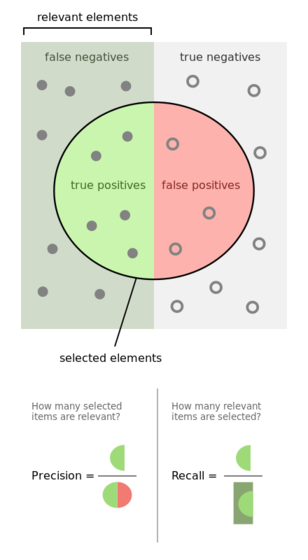

In [30]:
Image("точность и полнота.png", width=400, height=400)

### Дерево решения

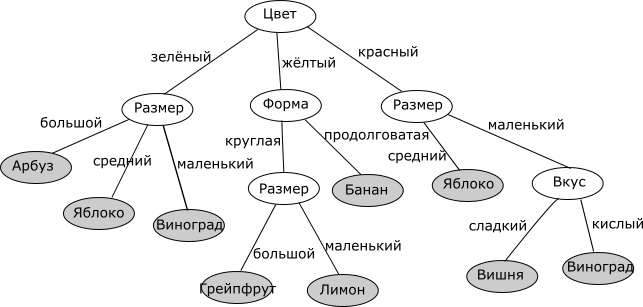

In [31]:
Image("tree.png")

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Дерево решений со стандартными параметрами

tree = DecisionTreeClassifier()

tree.fit(X_train_norm, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
# Предсказания
Pred_tree_train = tree.predict(X_train_norm)
Pred_tree_test = tree.predict(X_test_norm)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, Pred_tree_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, Pred_tree_test), 2))

Правильность на обучающем наборе:  1.0
Правильность на тестовом наборе:  0.75


In [34]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names = X_train.columns) #print dotfile

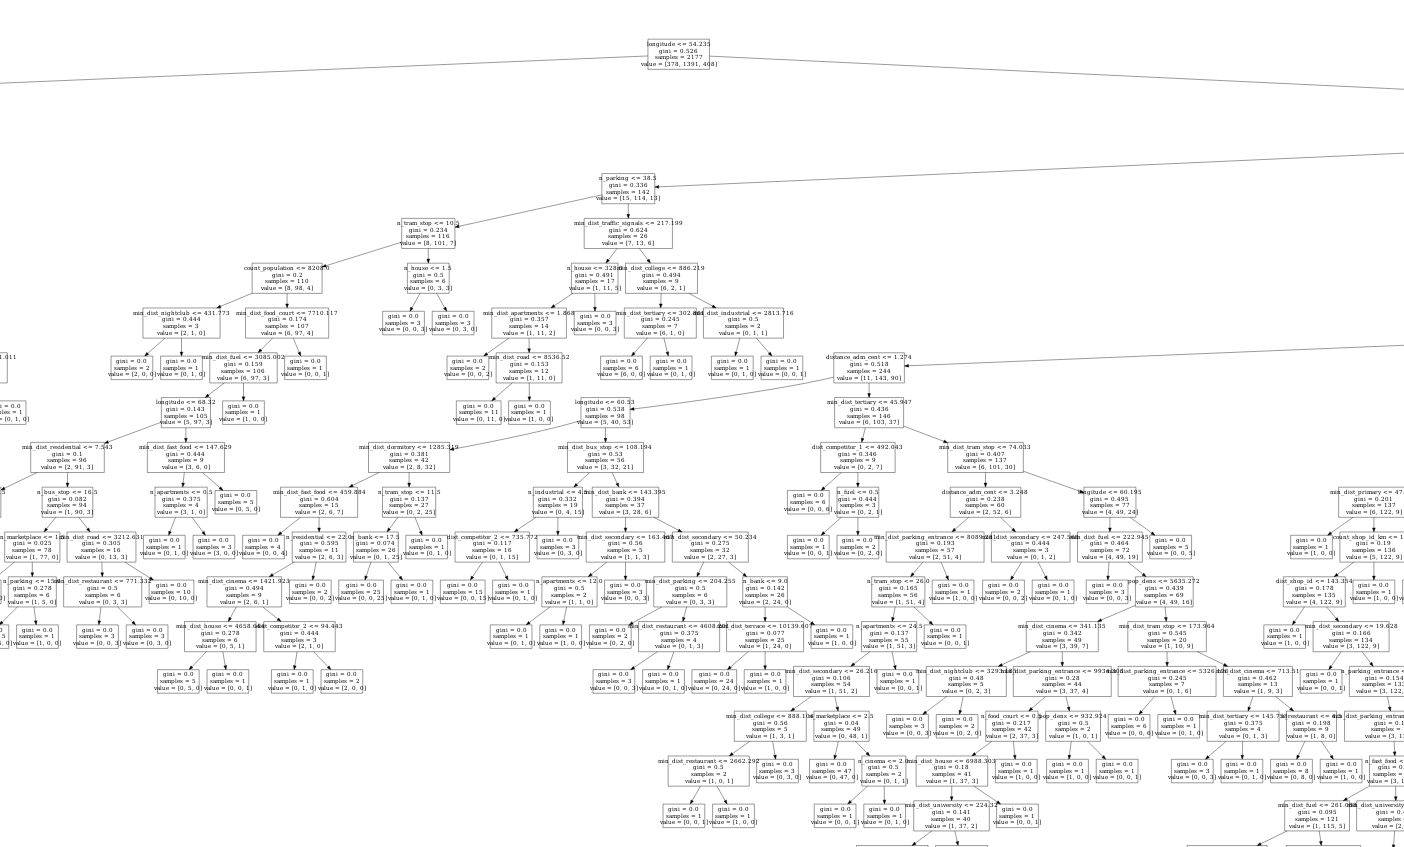

In [35]:
# http://www.webgraphviz.com/
Image("Webgraphviz.png")

In [60]:
# Дерево решений с установленными параметрами

tree = DecisionTreeClassifier(max_depth=8)
tree.fit(X_train_norm, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
# Предсказания
Pred_tree_train = tree.predict(X_train_norm)
Pred_tree_test = tree.predict(X_test_norm)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, Pred_tree_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, Pred_tree_test), 2))

Правильность на обучающем наборе:  0.89
Правильность на тестовом наборе:  0.76


In [38]:
export_graphviz(tree, out_file='tree.dot', feature_names = X_train.columns) #print dotfile

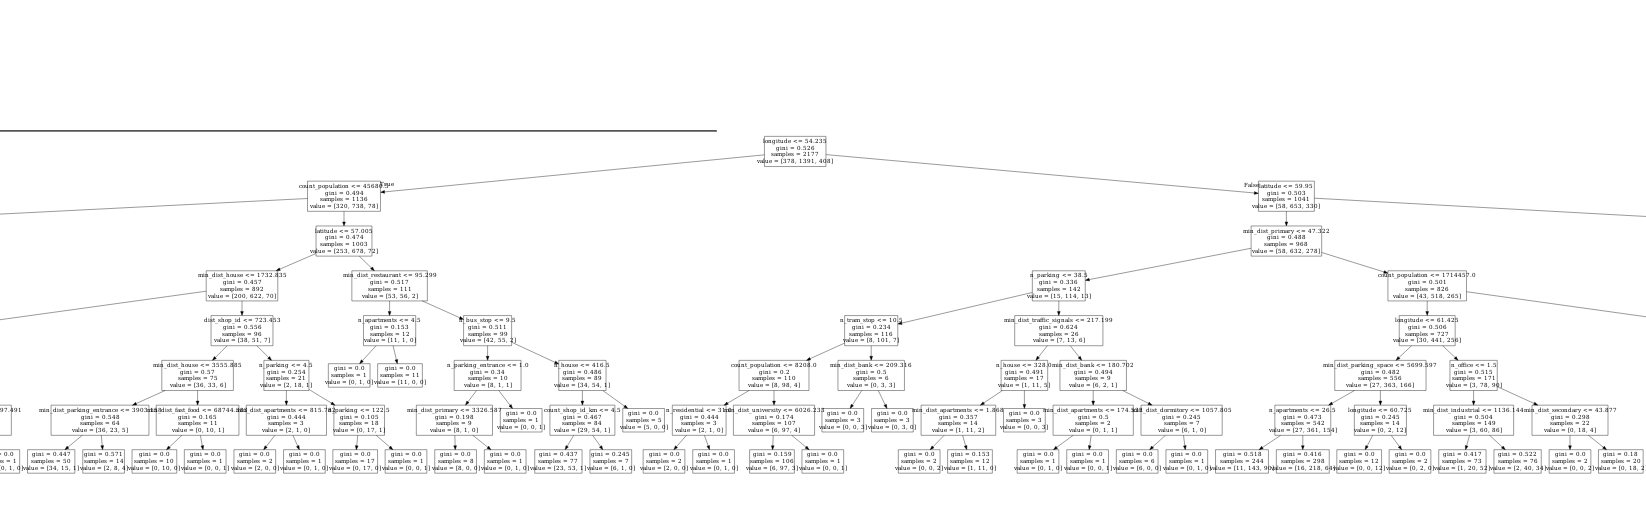

In [39]:
Image("Webgraphviz2.png")

In [73]:
# Поиск оптимальных гиперпараметров по сетке

param_grid=[{
             'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15], 
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
            }]

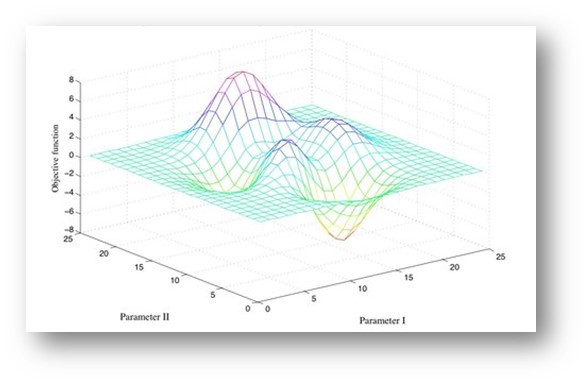

In [101]:
Image("поиск по сетке.jpeg")

In [74]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree, param_grid, cv=10)
grid_search.fit(X_train_norm, Y_train)

# Предсказания
Pred_tree_train = grid_search.predict(X_train_norm)
Pred_tree_test = grid_search.predict(X_test_norm)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, Pred_tree_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, Pred_tree_test), 2))

Правильность на обучающем наборе:  0.89
Правильность на тестовом наборе:  0.76


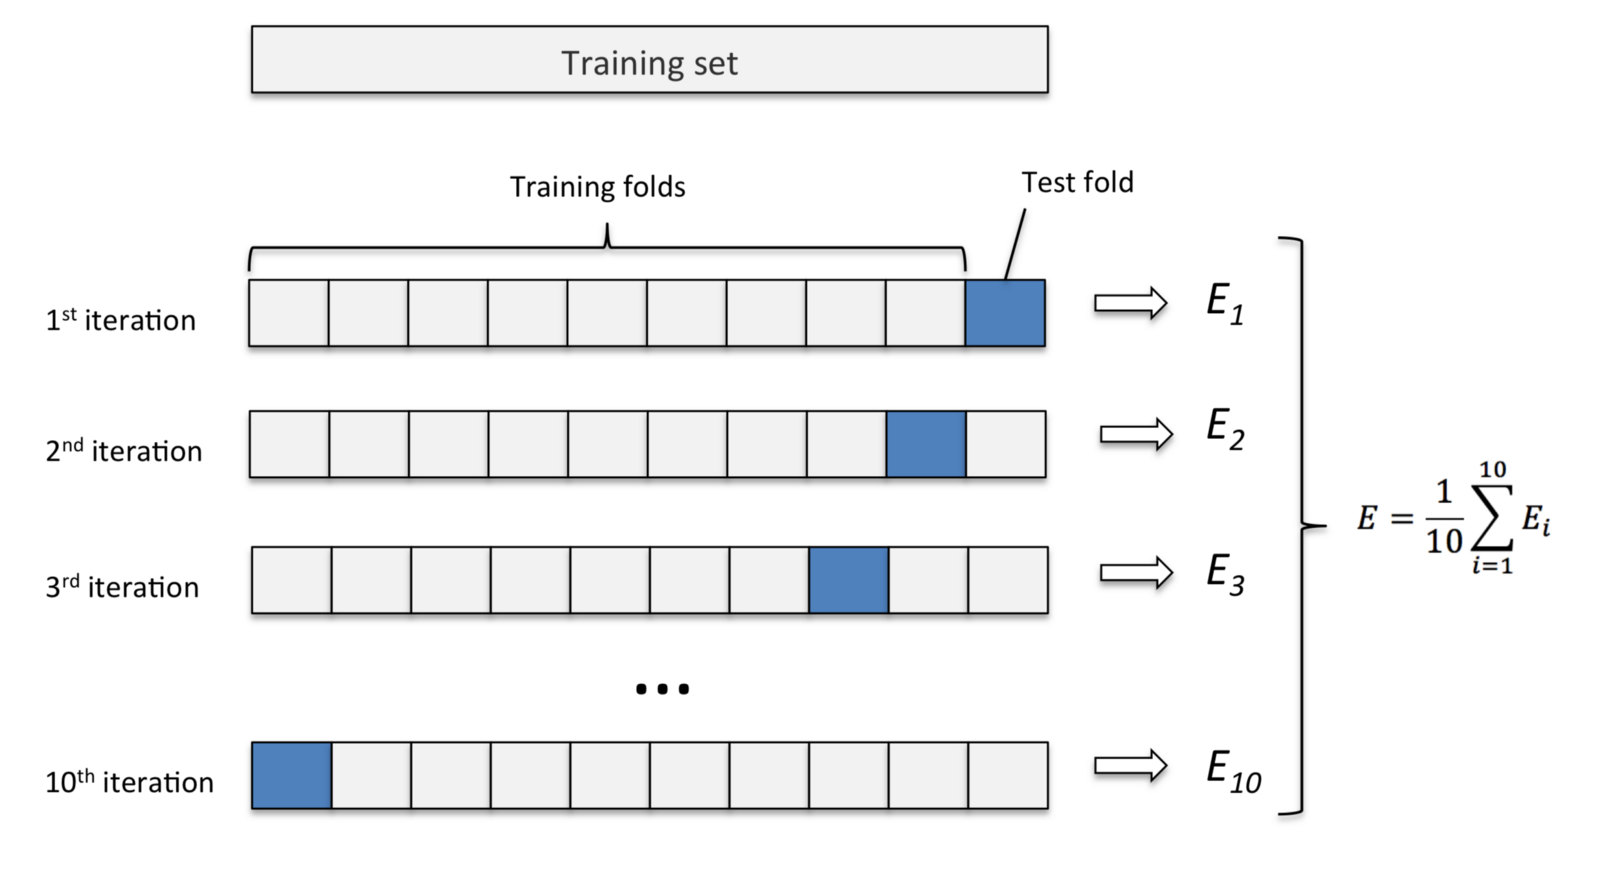

In [98]:
Image("кроссвалидация.png")

In [64]:
grid_search.best_params_

{'max_depth': 9, 'min_samples_leaf': 5}

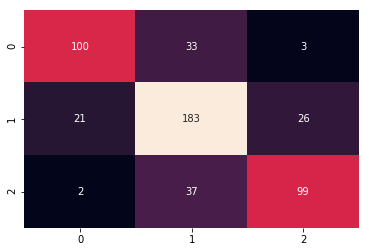

In [75]:
sns.heatmap(confusion_matrix(Y_test, Pred_tree_test), annot=True, fmt="d", cbar=False)

In [76]:
print(classification_report(Y_test, Pred_tree_test))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       136
           1       0.72      0.80      0.76       230
           2       0.77      0.72      0.74       138

   micro avg       0.76      0.76      0.76       504
   macro avg       0.77      0.75      0.76       504
weighted avg       0.76      0.76      0.76       504



In [77]:
# Значимость признаков

feature=pd.DataFrame(X_train.columns)
best_tree=grid_search.best_estimator_
feature['importances']=best_tree.feature_importances_
feature.sort_values(by='importances', ascending=False).head(10)

,0,importances
6,dist_shop_id,0.249856
1,longitude,0.171142
7,count_shop_id_km,0.098041
3,count_population,0.087551
4,pop_dens,0.063324
2,distance_adm_cent,0.058953
27,n_tram_stop,0.029079
47,n_restaurant,0.023374
15,min_dist_primary,0.018006
44,min_dist_cinema,0.015160


### К - ближайших соседей

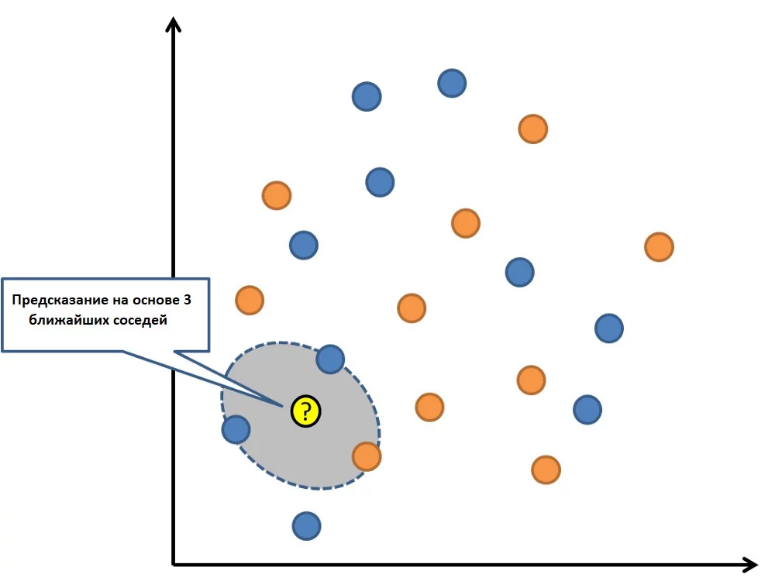

In [78]:
Image("k ближайших соседей.png")

In [79]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier()

clf.fit(X_train_norm, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [80]:
# Предсказания
Pred_clf_train = clf.predict(X_train_norm)
Pred_clf_test = clf.predict(X_test_norm)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, Pred_clf_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, Pred_clf_test), 2))

Правильность на обучающем наборе:  0.79
Правильность на тестовом наборе:  0.65


In [81]:
# Поиск оптимальных гиперпараметров по сетке

param_grid=[{
             'n_neighbors':[1, 2, 3, 5, 10, 20, 30, 40, 50],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'weights':['uniform', 'distance']
            }]

clf=KNeighborsClassifier(n_neighbors=5)
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X_train_norm, Y_train)

# Предсказания
Pred_clf_train = grid_search.predict(X_train_norm)
Pred_clf_test = grid_search.predict(X_test_norm)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, Pred_clf_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, Pred_clf_test), 2))

Правильность на обучающем наборе:  1.0
Правильность на тестовом наборе:  0.7


In [82]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 30, 'weights': 'distance'}

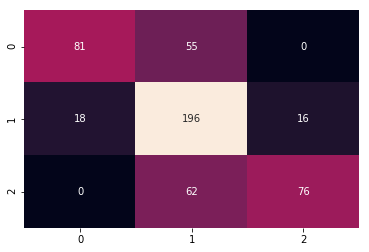

In [83]:
sns.heatmap(confusion_matrix(Y_test, Pred_clf_test), annot=True, fmt="d", cbar=False)

In [84]:
print(classification_report(Y_test, Pred_clf_test))

              precision    recall  f1-score   support

           0       0.82      0.60      0.69       136
           1       0.63      0.85      0.72       230
           2       0.83      0.55      0.66       138

   micro avg       0.70      0.70      0.70       504
   macro avg       0.76      0.67      0.69       504
weighted avg       0.73      0.70      0.70       504



### Логистическая регрессия

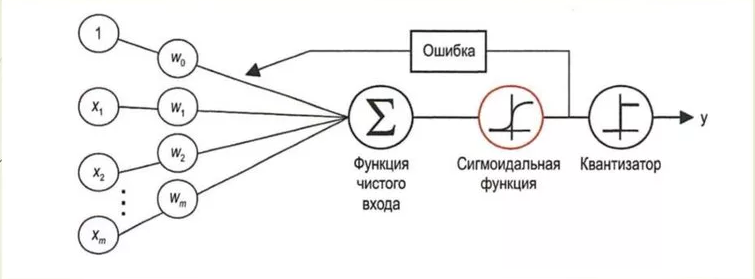

In [85]:
Image("логистическая регрессия.png")

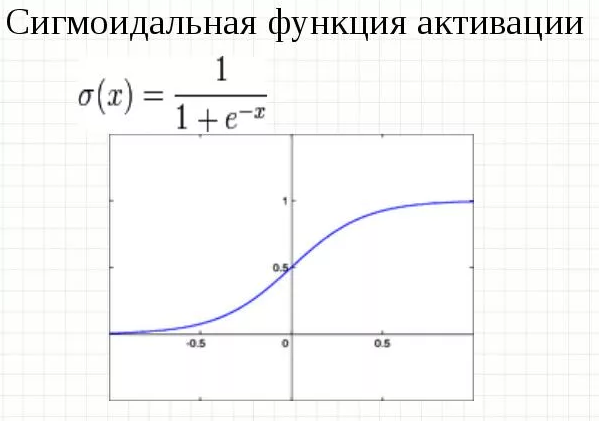

In [86]:
Image("сигмоидальная функция.png")

In [87]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train_norm, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
# Предсказания
Pred_lr_train = lr.predict(X_train_norm)
Pred_lr_test = lr.predict(X_test_norm)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, Pred_lr_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, Pred_lr_test), 2))

Правильность на обучающем наборе:  0.84
Правильность на тестовом наборе:  0.79


In [89]:
# Поиск оптимальных гиперпараметров по сетке

param_grid=[{
             'C':[0.1, 0.5, 0.75, 1, 10, 15, 50, 100],
             'max_iter':[1, 2, 3, 5, 10, 15, 20],
            }]

lr=LogisticRegression()
grid_search = GridSearchCV(lr, param_grid, cv=10)
grid_search.fit(X_train_norm, Y_train)

# Предсказания
Pred_lr_train = grid_search.predict(X_train_norm)
Pred_lr_test = grid_search.predict(X_test_norm)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, Pred_lr_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, Pred_lr_test), 2))

Правильность на обучающем наборе:  0.9
Правильность на тестовом наборе:  0.85


In [90]:
grid_search.best_params_

{'C': 100, 'max_iter': 10}

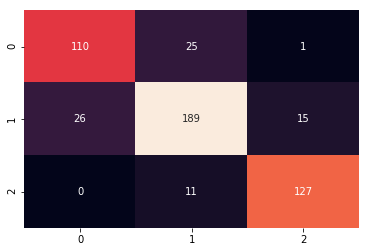

In [91]:
sns.heatmap(confusion_matrix(Y_test, Pred_lr_test), annot=True, fmt="d", cbar=False)

In [92]:
print(classification_report(Y_test, Pred_lr_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       136
           1       0.84      0.82      0.83       230
           2       0.89      0.92      0.90       138

   micro avg       0.85      0.85      0.85       504
   macro avg       0.85      0.85      0.85       504
weighted avg       0.84      0.85      0.84       504



## future engineering

In [99]:
X_train['min_dist_competitor'] = X_train[['dist_competitor_1', 'dist_competitor_2', 
                                            'dist_competitor_3', 'dist_competitor_4']].min(axis=1)
X_test['min_dist_competitor'] = X_test[['dist_competitor_1', 'dist_competitor_2', 
                                            'dist_competitor_3', 'dist_competitor_4']].min(axis=1)

mms=MinMaxScaler()
X_train_norm=mms.fit_transform(X_train)
X_test_norm=mms.transform(X_test)

In [100]:
lr=LogisticRegression()
grid_search = GridSearchCV(lr, param_grid, cv=10)
grid_search.fit(X_train_norm, Y_train)

# Предсказания
Pred_lr_train = grid_search.predict(X_train_norm)
Pred_lr_test = grid_search.predict(X_test_norm)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, Pred_lr_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, Pred_lr_test), 2))

Правильность на обучающем наборе:  0.95
Правильность на тестовом наборе:  0.91


### Домашнее задание

1. Реализовать алгоритм "Метод опорных векторов".
2. Реализовать алгоритм отбора признаков с целью улучшения качества работы модели (модель выбрать любую из представленных). Можно использовать уже готовые библиотеки или написать свою функцию.
3. Разобраться в представленных моделях. Выбрать модель с наилучшей точностью и полнотой и попытаться улучшить эти параметры с помощью отбора признаков, конструирования новых признаков, подбора гиперпараметров или другими способами.